<a href="https://colab.research.google.com/github/subbalakshmi3011/210701263_DEEP_LEARNING_CONCEPTS/blob/main/EXP9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


epoch: 1; G_loss: 0.781594; D_loss: 1.466685


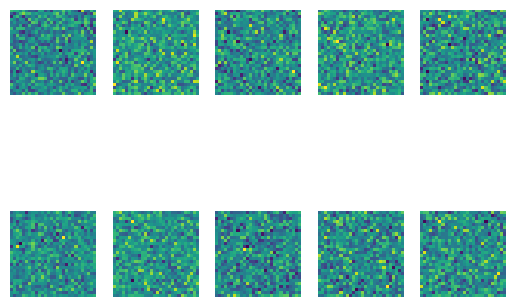

epoch: 101; G_loss: 4.404708; D_loss: 0.044166


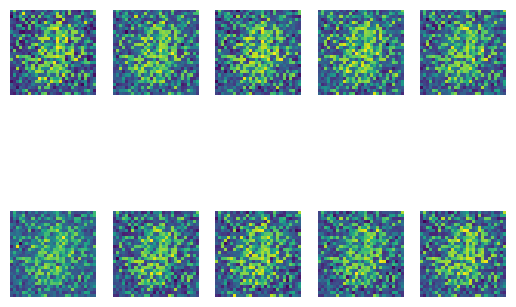

epoch: 201; G_loss: 4.915576; D_loss: 0.041716


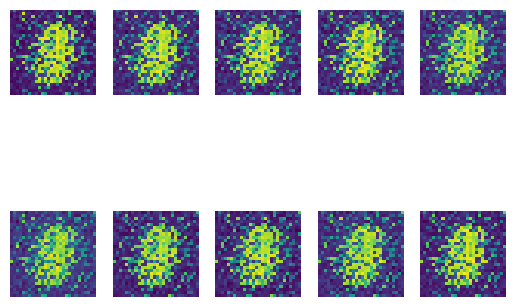

epoch: 301; G_loss: 4.761324; D_loss: 0.083133


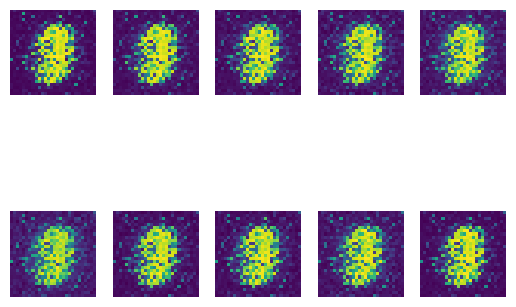

epoch: 401; G_loss: 3.004269; D_loss: 0.294048


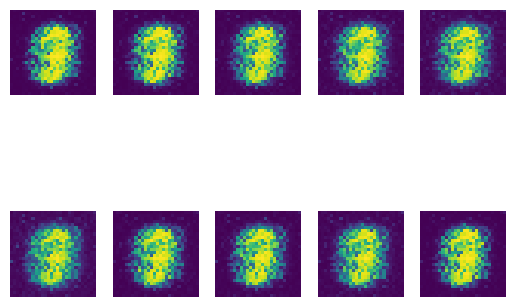

epoch: 501; G_loss: 2.680183; D_loss: 0.264843


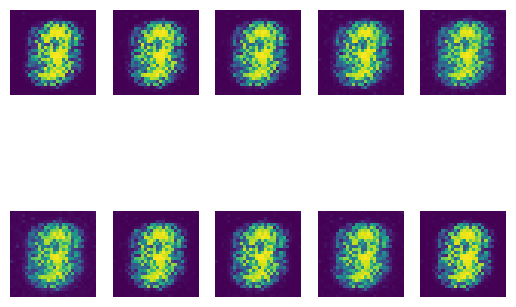

epoch: 601; G_loss: 2.823600; D_loss: 0.203011


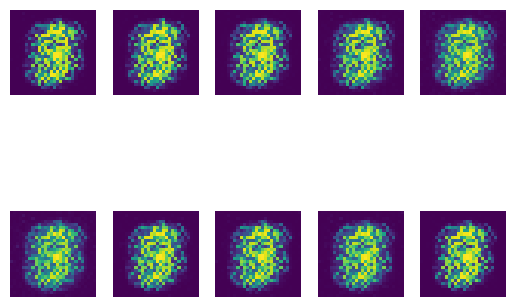

epoch: 701; G_loss: 3.047004; D_loss: 0.140423


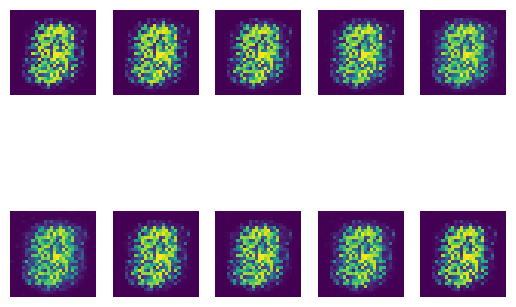

epoch: 801; G_loss: 3.139550; D_loss: 0.117280


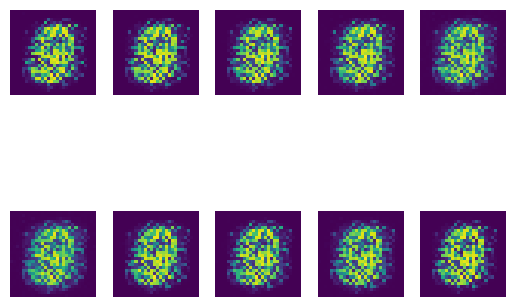

epoch: 901; G_loss: 3.335730; D_loss: 0.093768


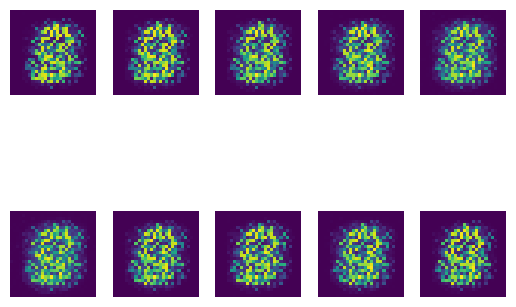

epoch: 1001; G_loss: 3.144576; D_loss: 0.104411


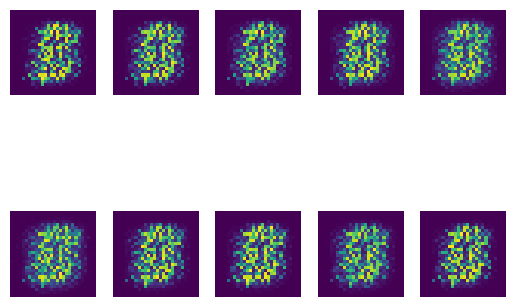

epoch: 1101; G_loss: 3.260322; D_loss: 0.076447


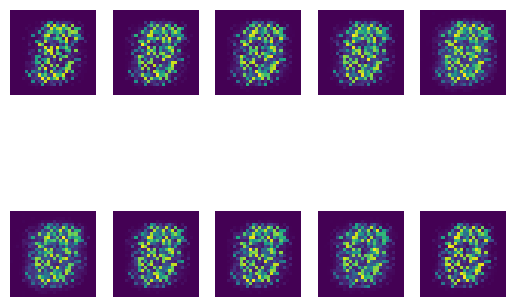

In [ ]:
# !pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
import matplotlib.pyplot as plt

batch_size = 100
epochs = 10000
z_dim = 20

# Noise for visualization
z_vis = tf.random.normal([10, z_dim])

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_iter = iter(tf.data.Dataset.from_tensor_slices(x_train).shuffle(4 * batch_size).batch(batch_size).repeat())

# Generator
G = tf.keras.models.Sequential([
  tf.keras.layers.Dense(28*28 // 2, input_shape = (z_dim,), activation='relu'),
  tf.keras.layers.Dense(28*28, activation='sigmoid'),
  tf.keras.layers.Reshape((28, 28))])

# Discriminator
D = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(28*28 // 2, activation='relu'),
 tf.keras.layers.Dense(1)])

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)
def G_loss(D, x_fake):
  return cross_entropy(tf.ones_like(D(x_fake)), D(x_fake))
def D_loss(D, x_real, x_fake):
  return cross_entropy(tf.ones_like(D(x_real)), D(x_real)) + cross_entropy(tf.zeros_like(D(x_fake)), D(x_fake))

# Optimizers
G_opt = tf.keras.optimizers.Adam(1e-4)
D_opt = tf.keras.optimizers.Adam(1e-4)

# Train
for epoch in range(epochs):
  z_mb = tf.random.normal([batch_size, z_dim])
  x_real = next(x_iter)
  # Record operations
  with tf.GradientTape() as G_tape, tf.GradientTape() as D_tape:
    x_fake = G(z_mb)
    G_loss_curr = G_loss(D, x_fake)
    D_loss_curr = D_loss(D, x_real, x_fake)
  # Gradients
  G_grad = G_tape.gradient(G_loss_curr, G.trainable_variables)
  D_grad = D_tape.gradient(D_loss_curr, D.trainable_variables)
  # Apply gradients
  G_opt.apply_gradients(zip(G_grad, G.trainable_variables))
  D_opt.apply_gradients(zip(D_grad, D.trainable_variables))

  if epoch % 100 == 0:
    # Print results
    print('epoch: {}; G_loss: {:.6f}; D_loss: {:.6f}'.format(epoch+1, G_loss_curr, D_loss_curr))
    # Plot generated images
    for i in range(10):
      plt.subplot(2, 5, i+1)
      plt.imshow(G(z_vis)[i,:,:]*255.0)
      plt.axis('off')
    plt.show()